# Домашняя работа №2
## Урок 2. SQL & Big Data
    
Условие:   
1. Загрузите датасет по ценам на жилье Airbnb, доступный на kaggle.com:    
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data   
2. Подсчитайте среднее значение и дисперсию по признаку ”price” в hive   
3. Используя Python, реализуйте скрипт mapper.py и reducer.py для расчета   
4. Проверьте правильность подсчета статистики методом mapreduce в сравнении с hive.

In [2]:
import opendatasets as od
import pandas as pd
import time
import math
from pathlib import Path
import json
from functools import reduce
from joblib import Parallel, delayed

## 1. Загрузите датасет по ценам на жилье Airbnb, доступный на kaggle.com:    
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data   

Скачиваем датасет по аналогиис семинаром 1.    
Загруженный датасет будет находиться в папке "new-york-city-airbnb-open-data"

In [3]:
dataset_path = Path('new-york-city-airbnb-open-data', 'AB_NYC_2019.csv')
# Или такая запись:
# dataset_path = Path('new-york-city-airbnb-open-data') / 'AB_NYC_2019.csv'
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data')

In [4]:
# Читаем файл
df = pd.read_csv(dataset_path)
print(df)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

## 2. Подсчитайте среднее значение и дисперсию по признаку ”price” в hive   

In [5]:
# Вычисление среднего значения
df['price'].mean()

152.7206871868289

In [6]:
# Вычисление дисперсии
df['price'].var()

57674.02524696099

## 3. Используя Python, реализуйте скрипт mapper.py и reducer.py для расчета   

In [7]:
# Вычисление цены
c = df['price']
c

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [8]:
c.to_csv('price.csv')

In [9]:
df1 = pd.read_csv('price.csv')
df1

,Unnamed: 0,price
0,0,149
1,1,225
2,2,150
3,3,89
4,4,80
...,...,...
48890,48890,70
48891,48891,40
48892,48892,115
48893,48893,55


In [10]:
df1['price'].mean()

152.7206871868289

In [11]:
df1['price'].var()

57674.02524696099

In [12]:
df1['price'].max()

10000

## 4. Проверьте правильность подсчета статистики методом mapreduce в сравнении с hive.

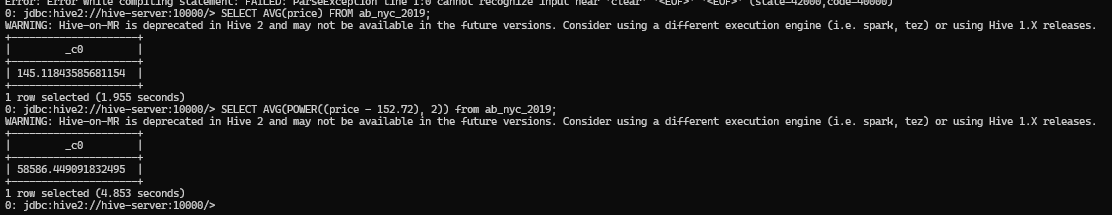